In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data

df = pd.read_csv(r"C:\Users\Prerana\Downloads\bank-full (1).csv",sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


EDA

In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#checking for missing values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
#checking for duplicated values
df.duplicated().sum()

0

In [7]:
#Correlation analysis
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [8]:
#Tranforming the data

le = LabelEncoder()
oe = OrdinalEncoder()

df['job'] = oe.fit_transform(df[['job']])
df['marital'] = oe.fit_transform(df[['marital']])
df['education'] = oe.fit_transform(df[['education']])
df['default'] = oe.fit_transform(df[['default']])
df['housing'] = oe.fit_transform(df[['housing']])
df['loan'] = oe.fit_transform(df[['loan']])
df['contact'] = oe.fit_transform(df[['contact']])
df['month'] = oe.fit_transform(df[['month']])
df['poutcome'] = oe.fit_transform(df[['poutcome']])

df['y'] = le.fit_transform(df['y'])

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,0


In [10]:
x = df.iloc[:,:16]
y = df['y']

In [11]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9.0,1.0,2.0,0.0,825,0.0,0.0,0.0,17,9.0,977,3,-1,0,3.0
45207,71,5.0,0.0,0.0,0.0,1729,0.0,0.0,0.0,17,9.0,456,2,-1,0,3.0
45208,72,5.0,1.0,1.0,0.0,5715,0.0,0.0,0.0,17,9.0,1127,5,184,3,2.0
45209,57,1.0,1.0,1.0,0.0,668,0.0,0.0,1.0,17,9.0,508,4,-1,0,3.0


splitting the data in training and testing

In [12]:
#Splitting the data in training and testing
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.75 , random_state= 1 )

In [13]:
xtrain.shape , xtest.shape

((11302, 16), (33909, 16))

In [14]:
ytrain.shape  , ytest.shape

((11302,), (33909,))

# Model Building

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lg = LogisticRegression()

In [17]:
lg.fit(xtrain,ytrain)

ypred = lg.predict(xtest)

In [18]:
len(xtest)

33909

In [19]:
len(ypred)

33909

In [20]:
print('Actual Y: ', ytest[:25].values)
print('Predict Y:', ypred[:25])

Actual Y:  [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predict Y: [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     29938
           1       0.55      0.18      0.27      3971

    accuracy                           0.89     33909
   macro avg       0.72      0.58      0.61     33909
weighted avg       0.86      0.89      0.86     33909



In [22]:
confusion_matrix(ytest,ypred)

array([[29335,   603],
       [ 3247,   724]], dtype=int64)

Model accuracy is 89%.

In [23]:
proba = lg.predict_proba(xtest)[:,1]
proba

array([0.02445752, 0.05643666, 0.38446681, ..., 0.10502493, 0.09004704,
       0.22499305])

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

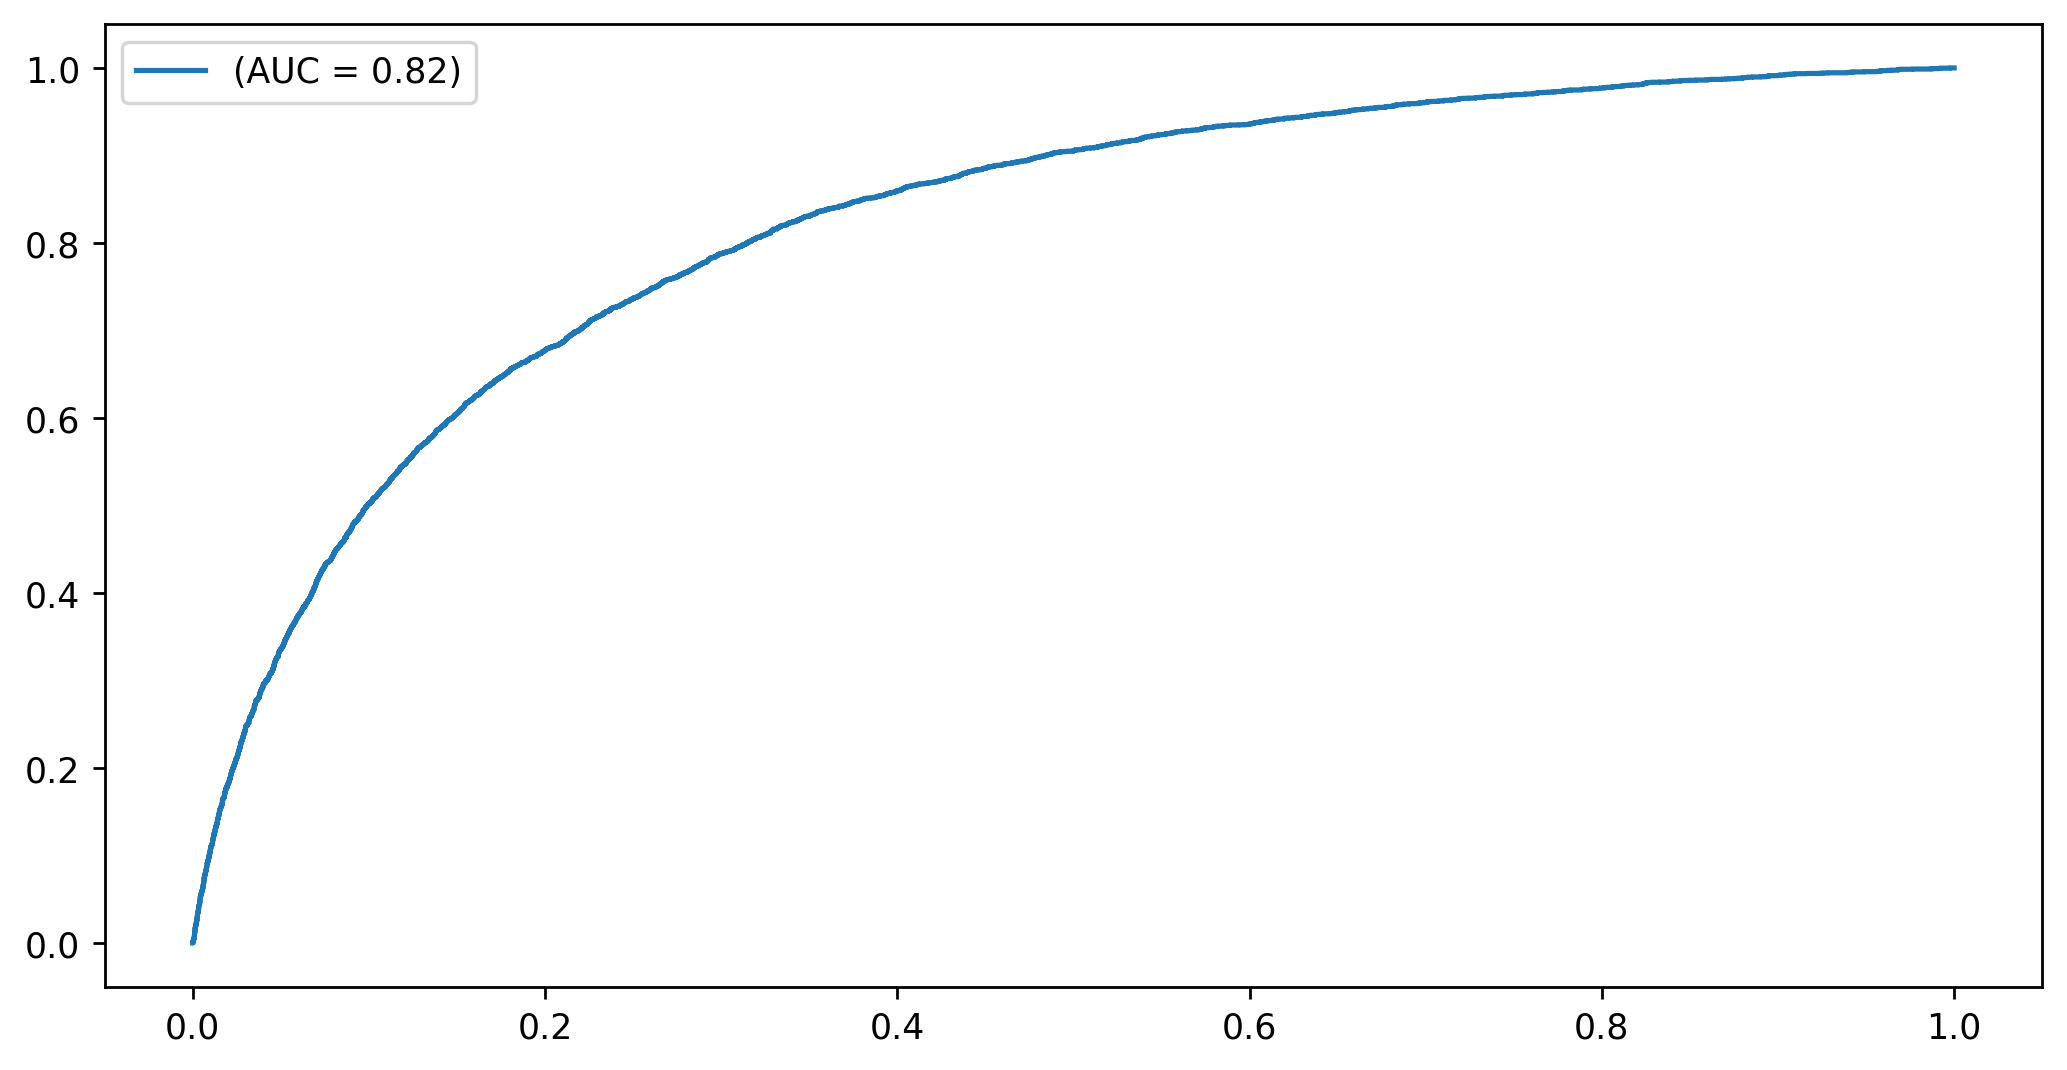

In [25]:
auc = roc_auc_score(ytest,proba)

fpr,tpr, threshold = roc_curve(ytest,proba)

plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)
plt.legend()

In [26]:
auc

0.8181130030855844

In [27]:
threshold

array([2.00000000e+00, 1.00000000e+00, 9.99914319e-01, ...,
       1.08804838e-05, 1.05499325e-05, 1.21515614e-10])

In [28]:
len(threshold)

5757

In [29]:
accuracy = []

for i in threshold:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))

final_threshold = pd.concat([pd.Series(threshold),pd.Series(accuracy)], axis=1)
final_threshold.columns = ['Threshold','Accuracy']

In [30]:
final_threshold.sort_values(by='Accuracy', ascending=False)

,Threshold,Accuracy
506,5.667935e-01,0.887169
505,5.671616e-01,0.887139
504,5.674354e-01,0.887139
507,5.667514e-01,0.887139
503,5.675163e-01,0.887110
...,...,...
5752,1.757773e-04,0.123979
5753,1.745713e-04,0.123949
5754,1.088048e-05,0.119201
5755,1.054993e-05,0.119172


In [31]:
from sklearn.preprocessing import binarize

In [32]:
yy = binarize([proba], threshold=0.442068)[0]
yy

array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
print(classification_report(ytest,yy))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94     29938
           1       0.53      0.22      0.31      3971

    accuracy                           0.89     33909
   macro avg       0.71      0.60      0.63     33909
weighted avg       0.86      0.89      0.86     33909



Model accuracy is 89%.